In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Readin dataset from Kaggle house price prediction competition

In [201]:
df = pd.read_csv('E:\\Media, Docs & Programs\\Practice\\DataScience\\House Price Kaggle\\train.csv')

In [202]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


## At a glance, we see that the houses in this database are located in different states, which were built between 1872 and 2010. It is also noteworthy that the land area of these houses is very scattered. These values are from 1300 feet to 215,000 feet. Naturally, this large area of land in the dataset cannot be expected to be seen repeatedly.

In [203]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## This can also be seen in the LotArea column distribution, which is highly skewed (right skew). Given the 99% quantile value and the graph showing the relationship between Lot area and sale price, we deleted data larger than 99% quantile.

37567.64000000021


C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


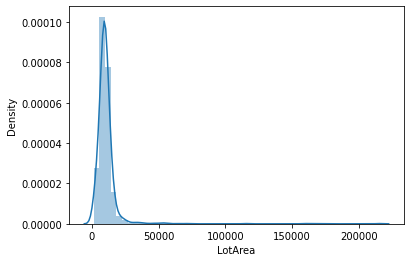

In [204]:
sns.distplot(df['LotArea'])
print(df['LotArea'].quantile(0.99))

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

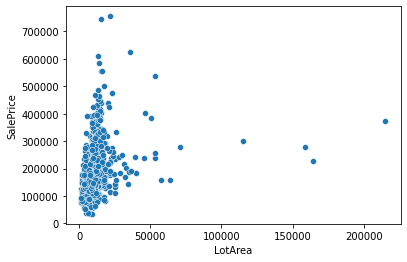

In [205]:
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

<AxesSubplot:ylabel='LotArea'>

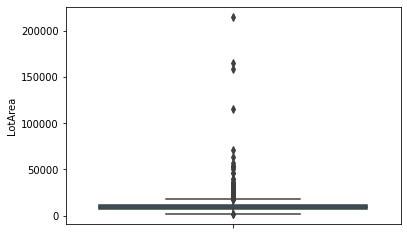

In [206]:
sns.boxplot(y=df['LotArea'])

## You can see that houses with land larger than 37,000 feet are extremely old.

In [212]:
df[df['LotArea']>df['LotArea'].quantile(0.99)]['YearBuilt']

53      1981
249     1958
271     1954
313     1965
335     1965
384     1992
451     1975
457     1954
523     2007
661     1994
706     1971
769     2003
848     1908
1298    2008
1396    1948
Name: YearBuilt, dtype: int64

In [195]:
df = df[df['LotArea']<=df['LotArea'].quantile(0.99)].reset_index().drop('index', axis=1)

## The amount of empty data must also be considered, some columns have a large number of empty values that must be handled correctly. But first let's look at which of these features have the most impact on the selling price and are correlated.

<AxesSubplot:>

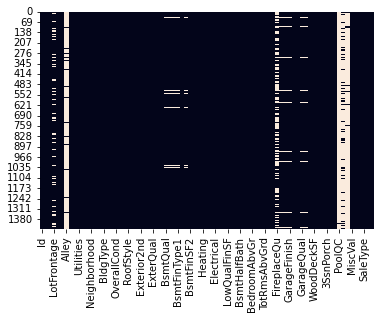

In [197]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

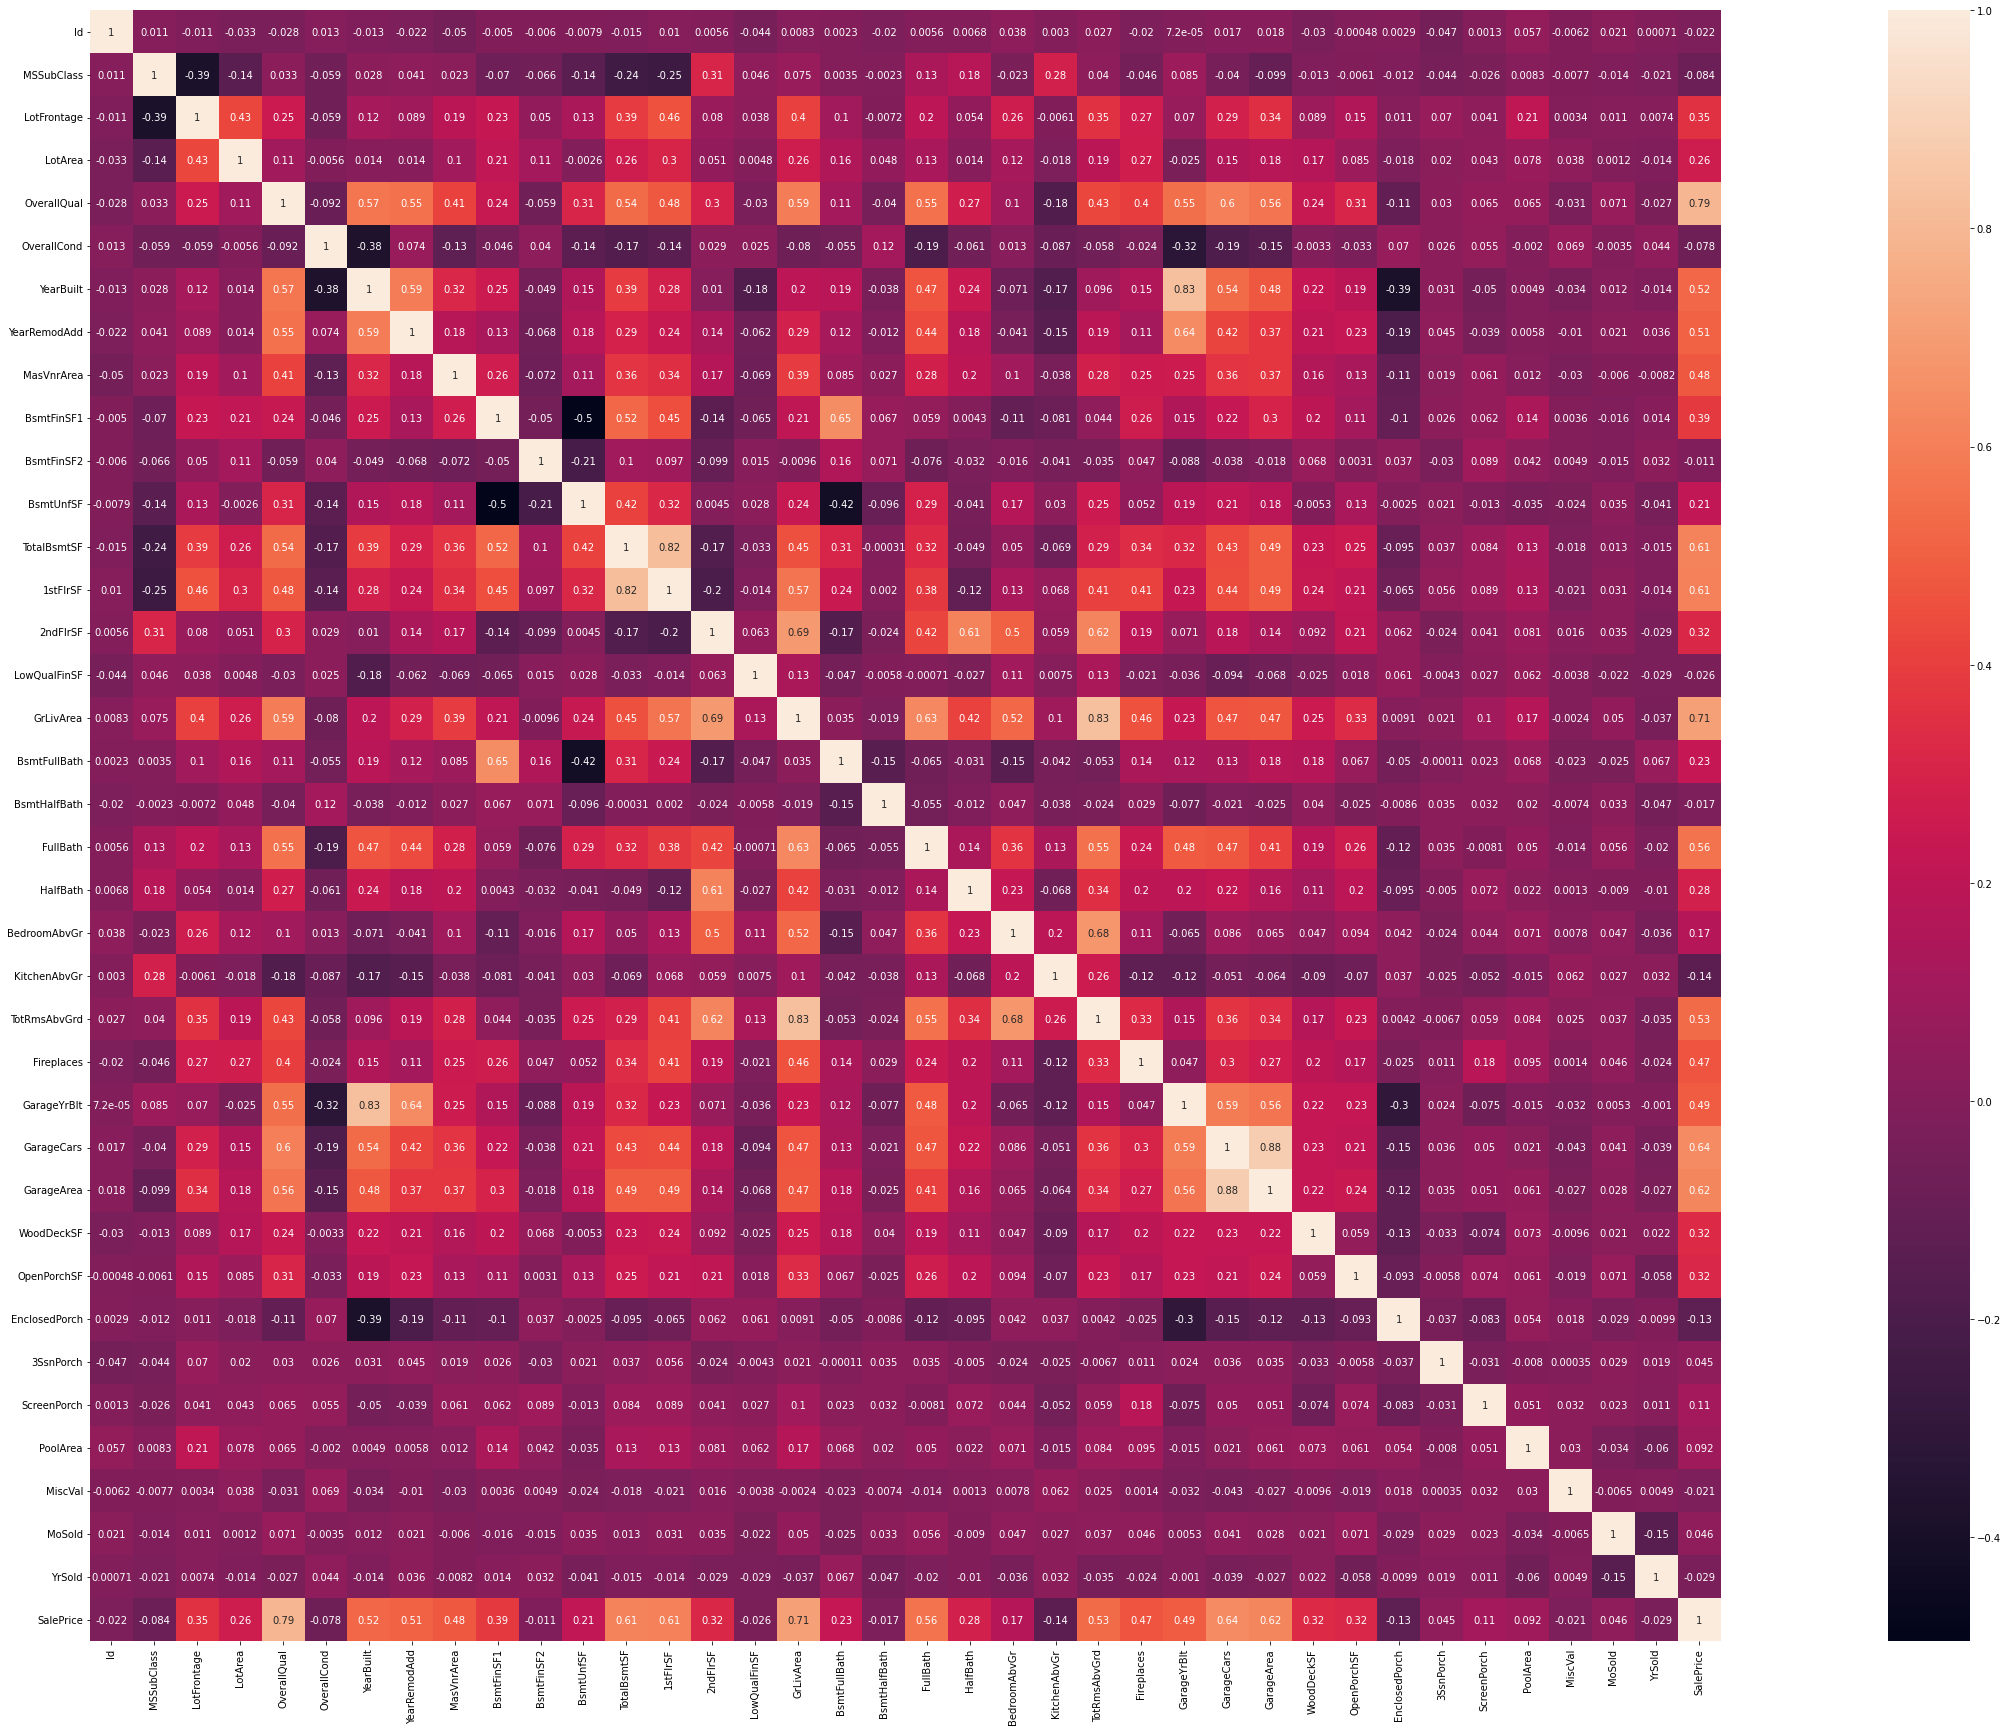

In [213]:
#Numeric Features
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
plt.subplots(figsize=(60, 30))
sns.heatmap(corr, square=True, annot=True)

In [ ]:
['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallQual', 'GarageCars', 'YearRemodAdd', 'SaleCondition', 'Neighborhood', '1stFloor', 'FullBath', 'roomabvgrnd']

## Now we will examine the features that their correlation with sale price are more than 0.5, but before that, let's look at the correlation between land area and sale price. The impact of land on price is not significant, and it can be assumed that the impact of property within the land has a major impact on price.

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

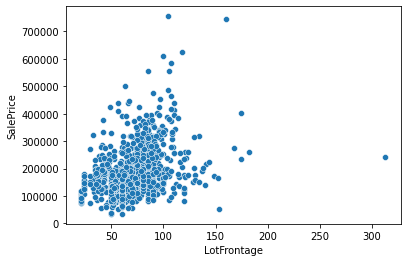

In [199]:
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

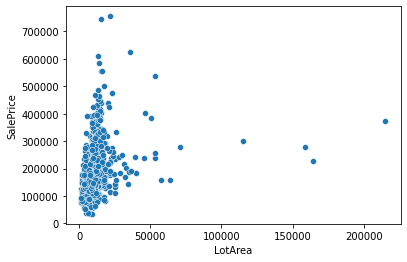

In [216]:
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

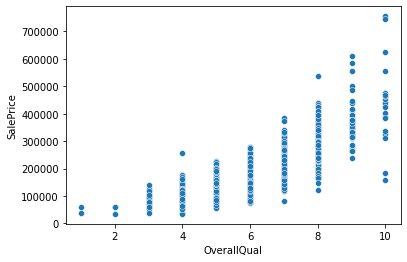

In [217]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

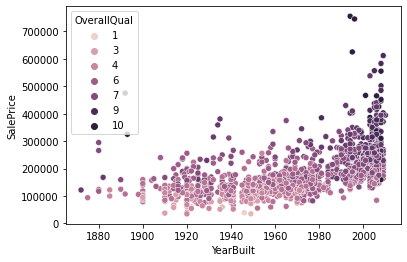

In [219]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', hue='OverallQual')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

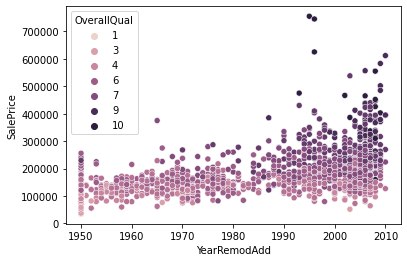

In [220]:
sns.scatterplot(data=df, x='YearRemodAdd', y='SalePrice', hue='OverallQual')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

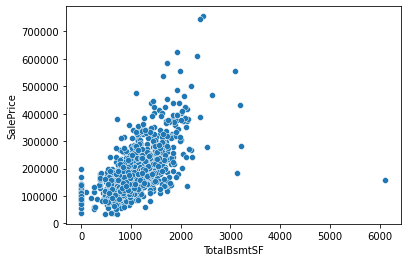

In [221]:
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

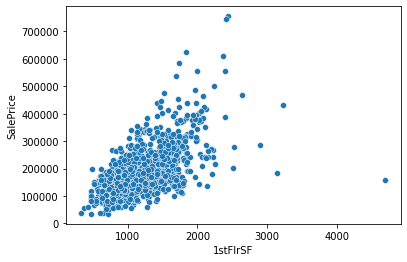

In [222]:
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

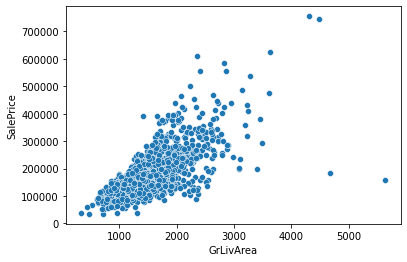

In [223]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

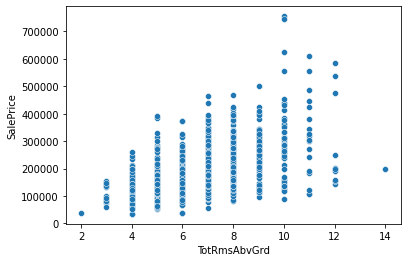

In [224]:
sns.scatterplot(data=df, x='TotRmsAbvGrd', y='SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

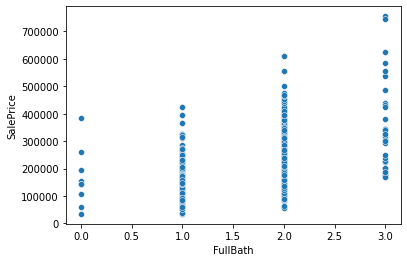

In [225]:
sns.scatterplot(data=df, x='FullBath', y='SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

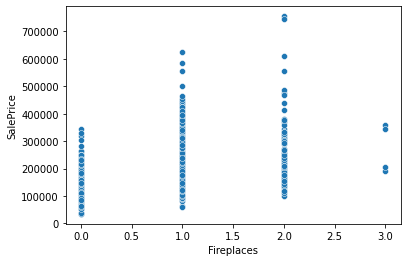

In [136]:
sns.scatterplot(data=df, x='Fireplaces', y='SalePrice')

In [233]:
# SaleCondition, Neighborhood
X = df[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'OverallQual', 'GarageCars', 'YearRemodAdd', 'SaleCondition', 'Neighborhood']]
y= df['SalePrice']

In [234]:
X

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,SaleCondition,Neighborhood
0,1710,856,2003,548,7,2,2003,Normal,CollgCr
1,1262,1262,1976,460,6,2,1976,Normal,Veenker
2,1786,920,2001,608,7,2,2002,Normal,CollgCr
3,1717,756,1915,642,7,3,1970,Abnorml,Crawfor
4,2198,1145,2000,836,8,3,2000,Normal,NoRidge
...,...,...,...,...,...,...,...,...,...
1455,1647,953,1999,460,6,2,2000,Normal,Gilbert
1456,2073,1542,1978,500,6,2,1988,Normal,NWAmes
1457,2340,1152,1941,252,7,1,2006,Normal,Crawfor
1458,1078,1078,1950,240,5,1,1996,Normal,NAmes


## Label and One Hot encoder for categorical features

In [235]:
from sklearn.preprocessing import LabelEncoder


# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
X['SaleCond_cat'] = labelencoder.fit_transform(X['SaleCondition'])
X['Neighbor_Cat'] = labelencoder.fit_transform(X['Neighborhood'])
X

C:\Users\Soroush\AppData\Local\Temp/ipykernel_11876/2952654225.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SaleCond_cat'] = labelencoder.fit_transform(X['SaleCondition'])
C:\Users\Soroush\AppData\Local\Temp/ipykernel_11876/2952654225.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Neighbor_Cat'] = labelencoder.fit_transform(X['Neighborhood'])


,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,SaleCondition,Neighborhood,SaleCond_cat,Neighbor_Cat
0,1710,856,2003,548,7,2,2003,Normal,CollgCr,4,5
1,1262,1262,1976,460,6,2,1976,Normal,Veenker,4,24
2,1786,920,2001,608,7,2,2002,Normal,CollgCr,4,5
3,1717,756,1915,642,7,3,1970,Abnorml,Crawfor,0,6
4,2198,1145,2000,836,8,3,2000,Normal,NoRidge,4,15
...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,1999,460,6,2,2000,Normal,Gilbert,4,8
1456,2073,1542,1978,500,6,2,1988,Normal,NWAmes,4,14
1457,2340,1152,1941,252,7,1,2006,Normal,Crawfor,4,6
1458,1078,1078,1950,240,5,1,1996,Normal,NAmes,4,12


In [236]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_X_sale = pd.DataFrame(enc.fit_transform(X[['SaleCond_cat']]).toarray())
enc_X_neigh = pd.DataFrame(enc.fit_transform(X[['Neighbor_Cat']]).toarray())


X = X.join(enc_X_sale, how='left', lsuffix='_left', rsuffix='_right')
X = X.join(enc_X_neigh, how='left', lsuffix='_left', rsuffix='_right')

X


,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,SaleCondition,Neighborhood,SaleCond_cat,...,15,16,17,18,19,20,21,22,23,24
0,1710,856,2003,548,7,2,2003,Normal,CollgCr,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1262,1262,1976,460,6,2,1976,Normal,Veenker,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1786,920,2001,608,7,2,2002,Normal,CollgCr,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1717,756,1915,642,7,3,1970,Abnorml,Crawfor,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2198,1145,2000,836,8,3,2000,Normal,NoRidge,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,1999,460,6,2,2000,Normal,Gilbert,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,2073,1542,1978,500,6,2,1988,Normal,NWAmes,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2340,1152,1941,252,7,1,2006,Normal,Crawfor,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1078,1078,1950,240,5,1,1996,Normal,NAmes,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [238]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,SaleCondition,Neighborhood,SaleCond_cat,...,15,16,17,18,19,20,21,22,23,24
1143,1006,1006,1959,0,5,0,1959,Normal,Sawyer,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1238,1141,1141,2005,484,6,2,2005,Abnorml,SawyerW,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1253,2167,1192,1974,518,7,2,2003,Normal,Veenker,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862,1097,1040,1984,480,6,2,1985,Normal,SawyerW,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
165,1355,644,1940,0,5,0,1999,Normal,Edwards,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1696,1140,1962,349,5,1,1962,Normal,Sawyer,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1168,2108,1127,1935,540,6,2,1986,Normal,Edwards,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,1392,689,2007,540,7,2,2007,Abnorml,Somerst,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
449,1183,649,1948,308,3,1,2002,Normal,OldTown,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling numeric columns

In [239]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual', 'GarageCars']] = scaler.fit_transform(X_train[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual', 'GarageCars']])

C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [240]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,SaleCondition,Neighborhood,SaleCond_cat,...,15,16,17,18,19,20,21,22,23,24
1143,0.126601,0.164648,0.635036,0.000000,0.444444,0.00,0.150000,Normal,Sawyer,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1238,0.152035,0.186743,0.970803,0.341326,0.555556,0.50,0.916667,Abnorml,SawyerW,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1253,0.345328,0.195090,0.744526,0.365303,0.666667,0.50,0.883333,Normal,Veenker,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862,0.143745,0.170213,0.817518,0.338505,0.555556,0.50,0.583333,Normal,SawyerW,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
165,0.192351,0.105401,0.496350,0.000000,0.444444,0.00,0.816667,Normal,Edwards,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.256594,0.186579,0.656934,0.246121,0.444444,0.25,0.200000,Normal,Sawyer,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1168,0.334213,0.184452,0.459854,0.380818,0.555556,0.50,0.600000,Normal,Edwards,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.199322,0.112766,0.985401,0.380818,0.666667,0.50,0.950000,Abnorml,Somerst,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
449,0.159947,0.106219,0.554745,0.217207,0.222222,0.25,0.866667,Normal,OldTown,4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
X_train = X_train.drop(['SaleCondition', 'Neighborhood', 'SaleCond_cat', 'Neighbor_Cat'], axis=1)

In [242]:
X_train

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,0_left,1_left,2_left,...,15,16,17,18,19,20,21,22,23,24
1143,0.126601,0.164648,0.635036,0.000000,0.444444,0.00,0.150000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1238,0.152035,0.186743,0.970803,0.341326,0.555556,0.50,0.916667,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1253,0.345328,0.195090,0.744526,0.365303,0.666667,0.50,0.883333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
862,0.143745,0.170213,0.817518,0.338505,0.555556,0.50,0.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
165,0.192351,0.105401,0.496350,0.000000,0.444444,0.00,0.816667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0.256594,0.186579,0.656934,0.246121,0.444444,0.25,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1168,0.334213,0.184452,0.459854,0.380818,0.555556,0.50,0.600000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.199322,0.112766,0.985401,0.380818,0.666667,0.50,0.950000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
449,0.159947,0.106219,0.554745,0.217207,0.222222,0.25,0.866667,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [244]:
from sklearn.preprocessing import MinMaxScaler
# transform data
X_test[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual', 'GarageCars']] = scaler.transform(X_test[['GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageArea', 'YearRemodAdd', 'OverallQual', 'GarageCars']])


C:\Users\Soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [245]:
X_test = X_test.drop(['SaleCondition', 'Neighborhood', 'SaleCond_cat', 'Neighbor_Cat'], axis=1)

In [246]:
X_test

,GrLivArea,TotalBsmtSF,YearBuilt,GarageArea,OverallQual,GarageCars,YearRemodAdd,0_left,1_left,2_left,...,15,16,17,18,19,20,21,22,23,24
991,0.265260,0.149918,0.072993,0.299013,0.777778,0.50,0.600000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1036,0.242276,0.265139,0.985401,0.643159,0.888889,0.75,0.966667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1277,0.261869,0.274959,0.693431,0.338505,0.555556,0.50,0.433333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,0.123210,0.161702,0.598540,0.366714,0.444444,0.50,0.066667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1128,0.306142,0.138625,0.963504,0.306065,0.666667,0.50,0.916667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.285983,0.147300,1.000000,0.454161,0.666667,0.50,0.983333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
942,0.208365,0.235679,0.766423,0.000000,0.333333,0.00,0.450000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.188772,0.104255,0.350365,0.401975,0.333333,0.25,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.149020,0.184124,0.978102,0.303244,0.444444,0.50,0.950000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
y_pred = regressor.predict(X_test)

In [248]:
y_train_pred = regressor.predict(X_train)

In [249]:
k_train = X_test.shape[1]
n_train = len(X_test)

In [250]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1-(1-r2_train) * (n_train-1)/(n_train-k_train-1)
print('r2 train score: ', r2_train)
print('Adjusted r2 train score: ', adj_r2_train)

r2 train score:  0.8090097176222237
Adjusted r2 train score:  0.7803234301504629


In [251]:
k = X_test.shape[1]
n = len(X_test)

In [252]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, mean_squared_log_error

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
print('r2 score: ', r2)
print('Adjusted r2 score: ', adj_r2)

r2 score:  0.8368151632422425
Adjusted r2 score:  0.8123051877608402


In [253]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
rmse = np.power(mse, 1/2)
rmsle = np.power(msle, 1/2)
mape = mean_absolute_percentage_error(y_test, y_pred)

# printing values
# print('Slope:' ,regressor.coef_)
# print('Intercept:', regressor.intercept_)
print('\nmean squared error: ', mse)
print('mean absolute error: ', mae)
print('root mean squared error: ', rmse)
print('mean absolute percentage error: ', mape)
print('root mean_squared_log_error: ', rmsle)


mean squared error:  1116455591.0252757
mean absolute error:  21817.709828615967
root mean squared error:  33413.40436150252
mean absolute percentage error:  0.12742112930501814
root mean_squared_log_error:  0.1812094671093624
